# **EDA**  

Exploratory Data Analysis (EDA) is a critical process in data analysis that helps in understanding the underlying patterns, relationships, and structure within a dataset. It is typically performed at the initial stages of data analysis and involves summarizing the data using visualizations, statistical techniques, and descriptive statistics to gain insights and identify potential issues in the data, such as missing values, outliers, or anomalies.

The key objectives of EDA are:
1. **Understanding Data Distribution**: This involves analyzing the distribution of individual variables using tools like histograms, box plots, and density plots.
2. **Identifying Relationships**: Exploring relationships between variables using scatter plots, correlation matrices, and pair plots to detect trends or associations.
3. **Detecting Outliers and Anomalies**: Identifying unusual or extreme values that may need further investigation or preprocessing.
4. **Handling Missing Data**: Finding and understanding patterns of missing values and deciding how to handle them (e.g., through imputation or deletion).
5. **Feature Selection**: Gaining insight into which features are important and potentially reducing the dimensionality of the dataset.

EDA often helps guide the selection of models and techniques for more in-depth analysis or machine learning. Tools like Python libraries (Pandas, Matplotlib, Seaborn) are commonly used for EDA.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
data = pd.read_csv('REV_dataset.csv')

1. **Understanding Data Distribution**  
Use histograms, box plots, and pair plots to visualize the distribution of numerical features.

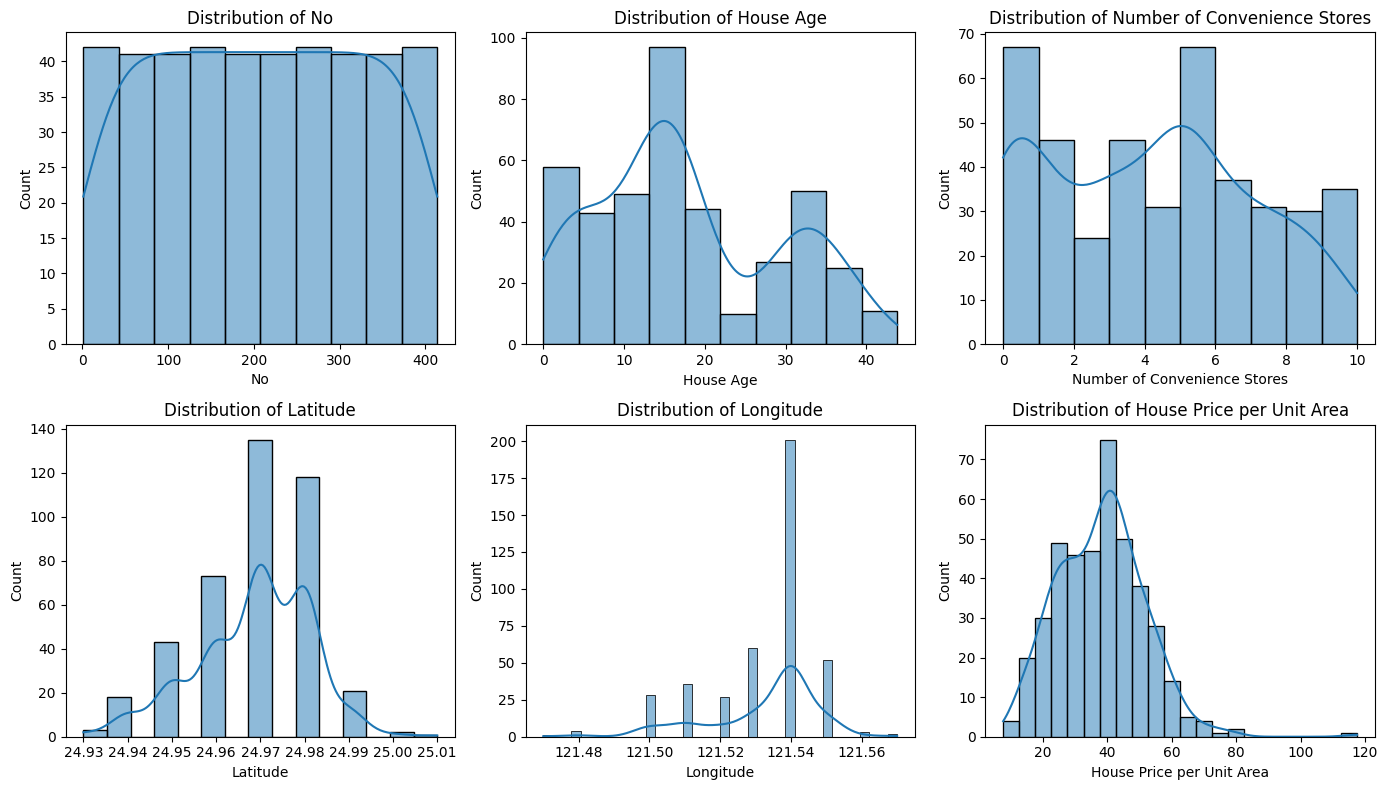

In [7]:
# Understanding Data Distribution
def plot_distributions(df):
    plt.figure(figsize=(14, 8))
    for i, column in enumerate(df.select_dtypes(include=np.number).columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()
plot_distributions(data)

2. **Identifying Relationships**  
Explore relationships between variables using scatter plots and correlation matrices.

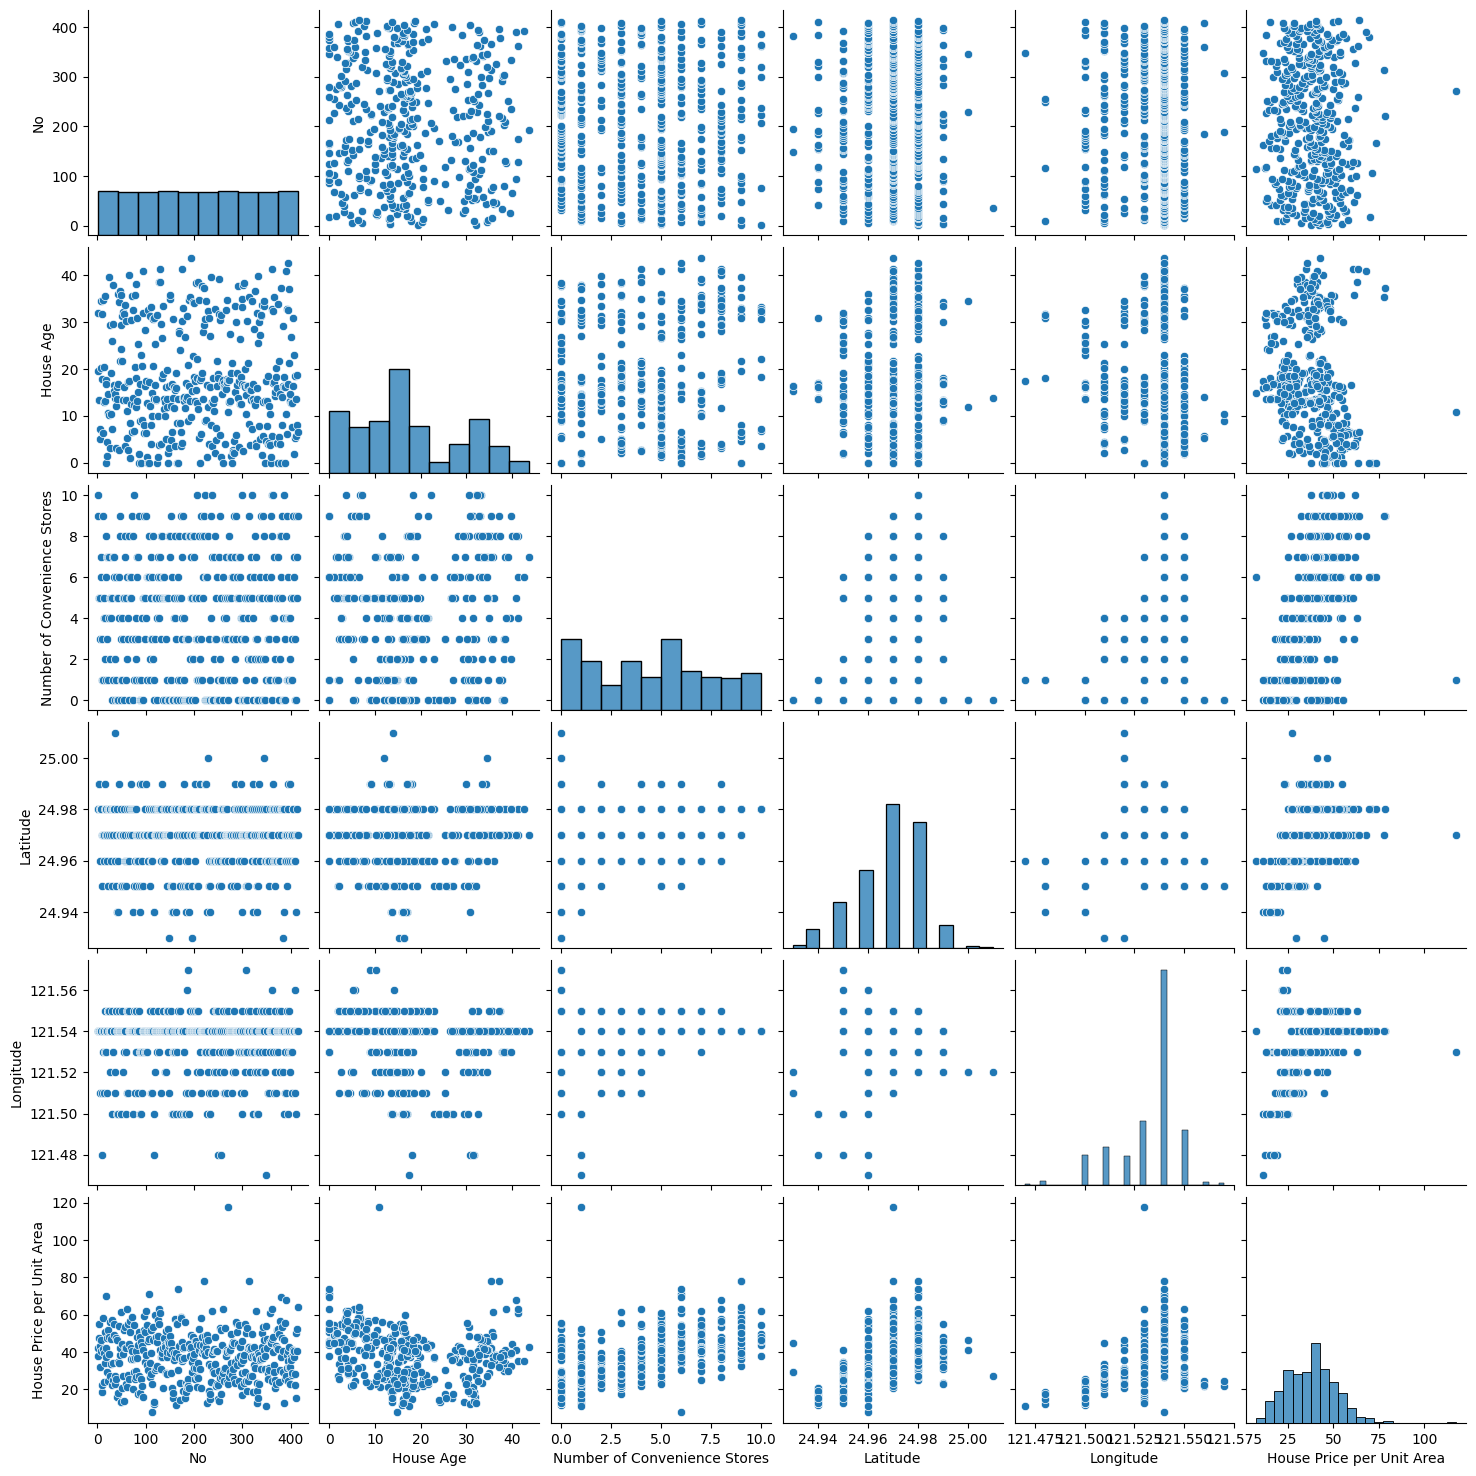

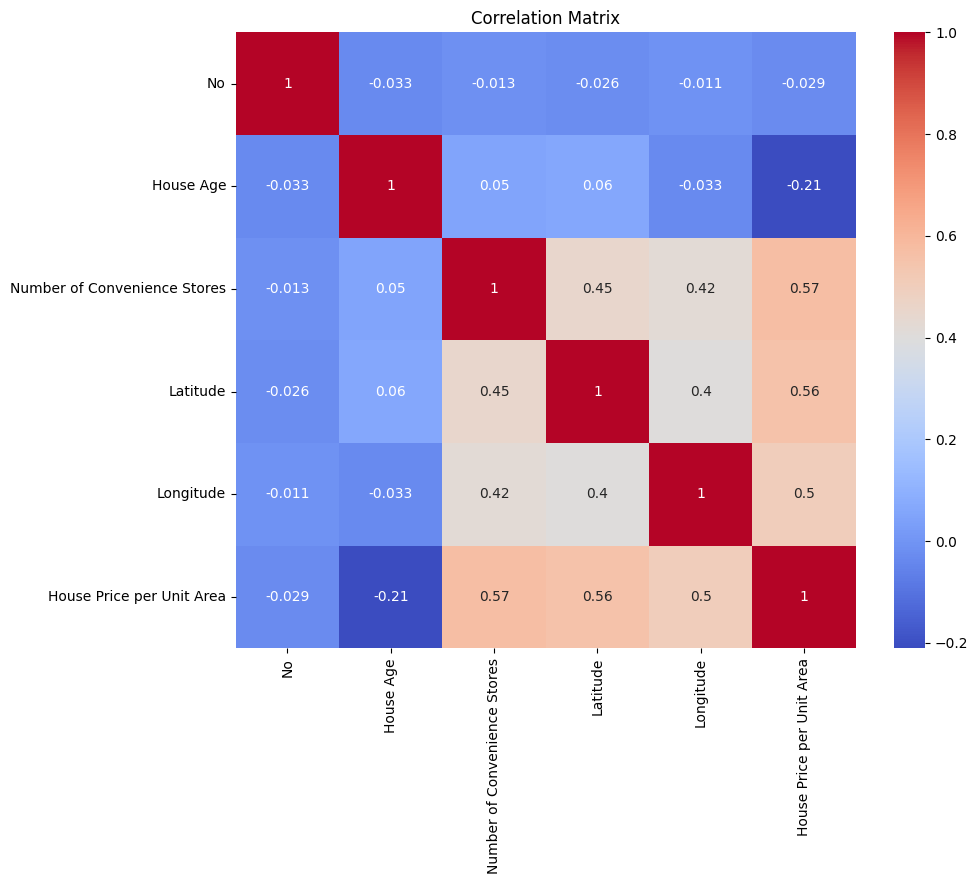

In [14]:
# Identifying Relationships (Pair Plot & Correlation Heatmap)
def plot_relationships(df):
    # Select only numeric columns for pairplot and correlation
    numeric_df = df.select_dtypes(include='number')

    # Pairplot for relationships between numerical columns
    sns.pairplot(numeric_df)
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Apply the updated function
plot_relationships(data)

3. **Detecting Outliers and Anomalies**  
Use box plots and Z-scores to detect potential outliers.

In [9]:
# Detecting Outliers
from scipy import stats

def detect_outliers(df, threshold=3):
    numeric_columns = df.select_dtypes(include=np.number).columns
    z_scores = np.abs(stats.zscore(df[numeric_columns]))
    outliers = (z_scores > threshold).sum(axis=0)
    print("Number of outliers in each numeric column:\n", outliers)
detect_outliers(data)

Number of outliers in each numeric column:
 No                              0
House Age                       0
Number of Convenience Stores    0
Latitude                        4
Longitude                       5
House Price per Unit Area       1
dtype: int64


4. **Handling Missing Data**  
Identify and handle missing data by filling or dropping missing values.

In [22]:
# Handling Missing Data
def handle_missing_data(df):
    print("Missing values in each column before cleaning:\n", df.isnull().sum())
    
    # Ensure the 'Distance to MRT Station' column is treated as strings, then remove commas and convert to numeric
    df['Distance to MRT Station'] = df['Distance to MRT Station'].astype(str).str.replace(',', '', regex=False)
    df['Distance to MRT Station'] = pd.to_numeric(df['Distance to MRT Station'], errors='coerce')
    
    # Fill missing values with median
    df['Distance to MRT Station'].fillna(df['Distance to MRT Station'].median(), inplace=True)
    
    print("Missing values in each column after handling:\n", df.isnull().sum())
    return df

# Apply the function
data = handle_missing_data(data)


Missing values in each column before cleaning:
 No                              0
 Transaction Date               0
House Age                       0
Distance to MRT Station         0
Number of Convenience Stores    0
Latitude                        0
Longitude                       0
House Price per Unit Area       0
dtype: int64
Missing values in each column after handling:
 No                              0
 Transaction Date               0
House Age                       0
Distance to MRT Station         0
Number of Convenience Stores    0
Latitude                        0
Longitude                       0
House Price per Unit Area       0
dtype: int64


C:\Users\junai\AppData\Local\Temp\ipykernel_7172\2648045657.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance to MRT Station'].fillna(df['Distance to MRT Station'].median(), inplace=True)


5. **Feature Selection**  
Use correlation analysis to identify important features for prediction.

In [23]:
# Feature Selection (Correlation Analysis)
def feature_selection(df, target_column):
    # Convert all relevant columns to numeric where applicable
    df_cleaned = df.copy()
    
    # Convert all columns with numeric values stored as strings to numeric
    for column in df_cleaned.columns:
        df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')
    
    # Drop rows with any NaN values after conversion (optional, depending on data handling strategy)
    df_cleaned.dropna(inplace=True)
    
    # Perform correlation analysis
    correlation = df_cleaned.corr()[target_column].sort_values(ascending=False)
    print(f"Correlation with {target_column}:\n", correlation)

feature_selection(data, 'House Price per Unit Area')


Correlation with House Price per Unit Area:
 No                             NaN
 Transaction Date              NaN
House Age                      NaN
Distance to MRT Station        NaN
Number of Convenience Stores   NaN
Latitude                       NaN
Longitude                      NaN
House Price per Unit Area      NaN
Name: House Price per Unit Area, dtype: float64
